## Installing necessary libraries

In [9]:
!pip install imbalanced-learn



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [11]:
!pip install statsmodels


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



   ---------------------------------------- 0.0/9.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.6 MB ? eta -:--:--
   - -------------------------------------- 0.3/9.6 MB ? eta -:--:--
   - -------------------------------------- 0.3/9.6 MB ? eta -:--:--
   - -------------------------------------- 0.3/9.6 MB ? eta -:--:--
   - -------------------------------------- 0.3/9.6 MB ? eta -:--:--
   - -------------------------------------- 0.3/9.6 MB ? eta -:--:--
   - -------------------------------------- 0.3/9.6 MB ? eta -:--:--
   - -------------------------------------- 0.3/9.6 MB ? eta -:--:--
   -- ------------------------------------- 0.5/9.6 MB 174.8 kB/s eta 0:00:52
   -- ------------------

## Importing necessary libraries ##

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from statsmodels.stats.outliers_influence import variance_inflation_factor
import shap
import warnings
warnings.filterwarnings('ignore')


C:\Users\subik\.anaconda\python\envs\machinelearning\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Loading fraud detection CSV Data

In [4]:
df = pd.read_csv(r"C:\Users\subik\OneDrive\Document\PROJECT\Fraud_detection\Fraud.csv")
df.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


In [5]:
df.tail(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6362610,742,TRANSFER,63416.99,C778071008,63416.99,0.0,C1812552860,0.00,0.00,1,0
6362611,742,CASH_OUT,63416.99,C994950684,63416.99,0.0,C1662241365,276433.18,339850.17,1,0
6362612,743,TRANSFER,1258818.82,C1531301470,1258818.82,0.0,C1470998563,0.00,0.00,1,0
6362613,743,CASH_OUT,1258818.82,C1436118706,1258818.82,0.0,C1240760502,503464.50,1762283.33,1,0
6362614,743,TRANSFER,339682.13,C2013999242,339682.13,0.0,C1850423904,0.00,0.00,1,0
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0
6362619,743,CASH_OUT,850002.52,C1280323807,850002.52,0.0,C873221189,6510099.11,7360101.63,1,0


In [6]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


## Data Exploration ##

Shape: (6362620, 11)

Data Types:
 step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

Missing values:
 step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

Fraudulent transactions count:
 isFraud
0    6354407
1       8213
Name: count, dtype: int64


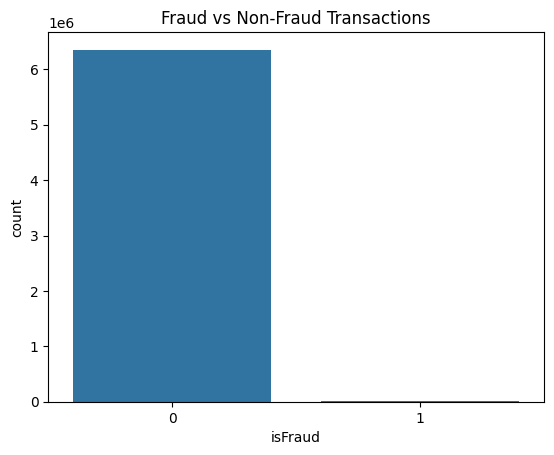

In [5]:
print("Shape:", df.shape)
print("\nData Types:\n", df.dtypes)
print("\nMissing values:\n", df.isnull().sum())
print("\nFraudulent transactions count:\n", df['isFraud'].value_counts())

# Plot class distribution
sns.countplot(data=df, x='isFraud')
plt.title("Fraud vs Non-Fraud Transactions")
plt.show()


## Data Cleaning ##

In [6]:
# Drop duplicates
df.drop_duplicates(inplace=True)

# No missing values in this dataset, so we skip imputation

# Remove unnecessary columns (names not useful for prediction)
df_cleaned = df.drop(['nameOrig', 'nameDest'], axis=1)

# Encode 'type' feature
df_cleaned = pd.get_dummies(df_cleaned, columns=['type'], drop_first=True)
df_cleaned.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,170136.0,160296.36,0.0,0.0,0,0,False,False,True,False
1,1,1864.28,21249.0,19384.72,0.0,0.0,0,0,False,False,True,False
2,1,181.00,181.0,0.00,0.0,0.0,1,0,False,False,False,True
3,1,181.00,181.0,0.00,21182.0,0.0,1,0,True,False,False,False
4,1,11668.14,41554.0,29885.86,0.0,0.0,0,0,False,False,True,False


In [7]:
print(df_cleaned.dtypes)

step                int64
amount            float64
oldbalanceOrg     float64
newbalanceOrig    float64
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
type_CASH_OUT        bool
type_DEBIT           bool
type_PAYMENT         bool
type_TRANSFER        bool
dtype: object


In [8]:
non_numeric = df_cleaned.select_dtypes(exclude=[np.number]).columns
print("Non-numeric columns:", non_numeric)

Non-numeric columns: Index(['type_CASH_OUT', 'type_DEBIT', 'type_PAYMENT', 'type_TRANSFER'], dtype='object')


In [9]:
df_cleaned = df_cleaned.astype({col: 'int' for col in df_cleaned.select_dtypes(include='bool').columns})

In [10]:
print(df_cleaned.dtypes)

step                int64
amount            float64
oldbalanceOrg     float64
newbalanceOrig    float64
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
type_CASH_OUT       int32
type_DEBIT          int32
type_PAYMENT        int32
type_TRANSFER       int32
dtype: object


In [11]:
# VIF to detect multicollinearity
X_temp = df_cleaned.drop(['isFraud', 'isFlaggedFraud'], axis=1)
vif_data = pd.DataFrame()
vif_data["Feature"] = X_temp.columns
vif_data["VIF"] = [variance_inflation_factor(X_temp.values, i) for i in range(X_temp.shape[1])]
print(vif_data.sort_values(by="VIF", ascending=False))

          Feature         VIF
3  newbalanceOrig  508.200245
2   oldbalanceOrg  502.775340
5  newbalanceDest   84.022951
4  oldbalanceDest   72.373007
1          amount    4.213518
0            step    3.008676
6   type_CASH_OUT    1.870070
8    type_PAYMENT    1.764562
9   type_TRANSFER    1.406324
7      type_DEBIT    1.016117


#### Since, both newbalanceOrig and oldbalanceOrg have high correlation, I am removing newbalanceOrig and NewbalanceDest to avoid overfitting ####

In [12]:
df_cleaned.drop(['newbalanceOrig', 'newbalanceDest'], axis=1, inplace=True)

In [13]:
df_cleaned.head()

,step,amount,oldbalanceOrg,oldbalanceDest,isFraud,isFlaggedFraud,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,170136.0,0.0,0,0,0,0,1,0
1,1,1864.28,21249.0,0.0,0,0,0,0,1,0
2,1,181.00,181.0,0.0,1,0,0,0,0,1
3,1,181.00,181.0,21182.0,1,0,1,0,0,0
4,1,11668.14,41554.0,0.0,0,0,0,0,1,0


In [14]:
df_cleaned.columns.tolist()

['step',
 'amount',
 'oldbalanceOrg',
 'oldbalanceDest',
 'isFraud',
 'isFlaggedFraud',
 'type_CASH_OUT',
 'type_DEBIT',
 'type_PAYMENT',
 'type_TRANSFER']

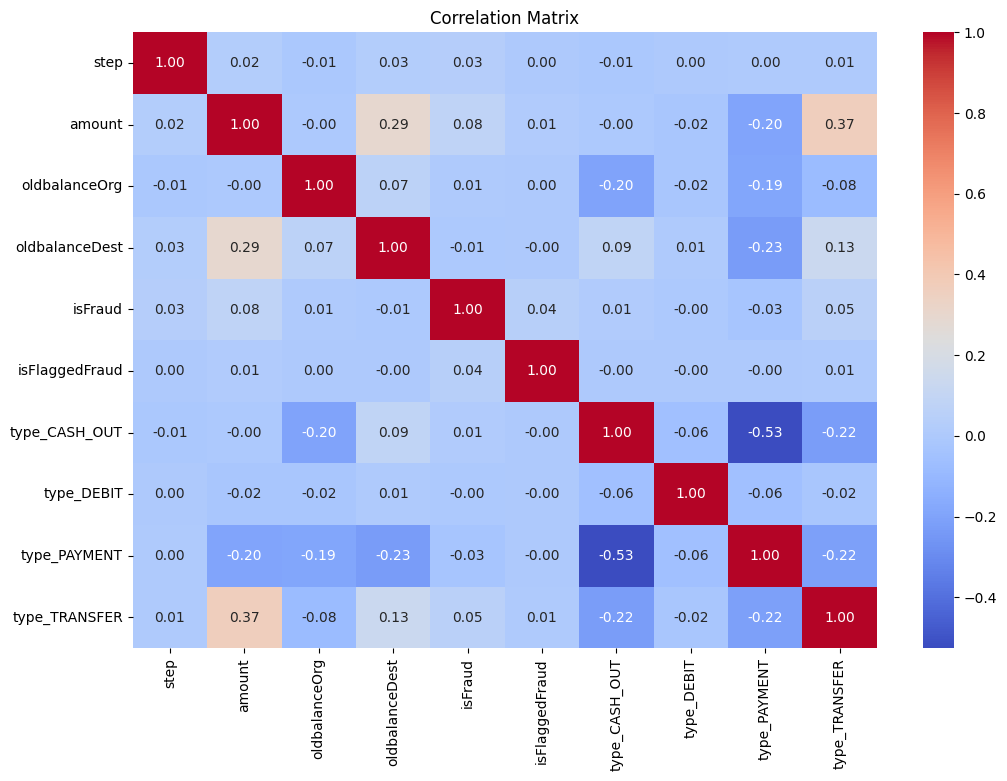

In [15]:
plt.figure(figsize=(12,8))
sns.heatmap(df_cleaned.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

#### Now, from the above correlation matrix, we can know that there's no extreme multicollinearity between the features based on correlation.

## Preprocessing & Resampling using SMOTE ##

In [16]:
X = df_cleaned.drop("isFraud", axis=1)
y = df_cleaned["isFraud"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Resample using SMOTE
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

print("After SMOTE: \n", y_train_res.value_counts())


After SMOTE: 
 isFraud
0    4448056
1    4448056
Name: count, dtype: int64


## Model building on the subset from the dataset ##

In [17]:
X_sample = X_train_res.sample(n=100_000, random_state=42)
y_sample = y_train_res.loc[X_sample.index]

print("Sample size:", X_sample.shape)

Sample size: (100000, 9)


In [18]:
X_test_sample = X_test.sample(n=100_000, random_state=42)
y_test_sample = y_test.loc[X_test_sample.index]

# Train the model
model = RandomForestClassifier(n_estimators=50, n_jobs=-1, random_state=42)
model.fit(X_sample, y_sample)

# Predict

y_prob = model.predict_proba(X_test_sample)[:, 1]
y_pred = (y_prob > 0.8).astype(int)  # increase threshold from 0.5 to 0.8


# Evaluate
print("\nClassification Report:\n", classification_report(y_test_sample, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test_sample, y_pred))
print("\nROC AUC Score:", roc_auc_score(y_test_sample, y_prob))



Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     99879
           1       0.25      0.93      0.39       121

    accuracy                           1.00    100000
   macro avg       0.62      0.96      0.70    100000
weighted avg       1.00      1.00      1.00    100000


Confusion Matrix:
 [[99543   336]
 [    9   112]]

ROC AUC Score: 0.9989671386675397


### Displaying Top features in the dataset that contributes to the fraud detection

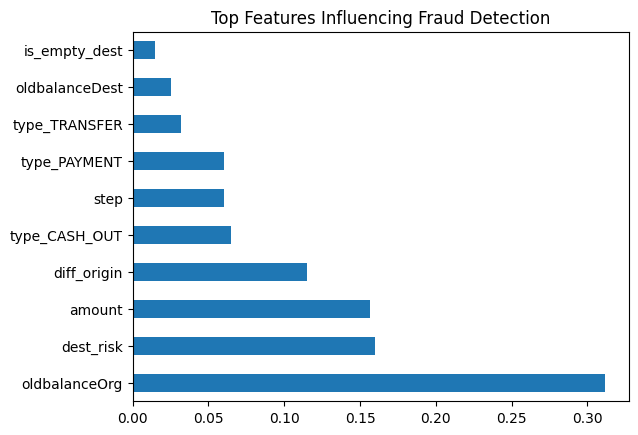

In [37]:
import matplotlib.pyplot as plt
import pandas as pd

feat_importances = pd.Series(model.feature_importances_, index=X_sample.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.title("Top Features Influencing Fraud Detection")
plt.show()


### Feature engineering: Derived Risk indicators for fraud detection ###

In [19]:
# Create new features
df_cleaned['diff_origin'] = df_cleaned['oldbalanceOrg'] - df_cleaned['amount']
df_cleaned['dest_risk'] = df_cleaned['amount'] / (df_cleaned['oldbalanceDest'] + 1)
df_cleaned['is_empty_dest'] = (df_cleaned['oldbalanceDest'] == 0).astype(int)

# (Optional) Replace negative values with 0 if it helps (e.g., no overdraft)
df_cleaned['diff_origin'] = df_cleaned['diff_origin'].clip(lower=0)



### Redefining features and target

In [20]:
# Define X and y
X = df_cleaned.drop("isFraud", axis=1)
y = df_cleaned["isFraud"]

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Apply SMOTE
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)


In [21]:
X_sample = X_train_res.sample(n=100_000, random_state=42)
y_sample = y_train_res.loc[X_sample.index]

X_test_sample = X_test.sample(n=100_000, random_state=42)
y_test_sample = y_test.loc[X_test_sample.index]


In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

model = RandomForestClassifier(n_estimators=50, n_jobs=-1, random_state=42)
model.fit(X_sample, y_sample)

# Predict with probability
y_prob = model.predict_proba(X_test_sample)[:, 1]
y_pred = (y_prob > 0.8).astype(int)  # threshold tuning

# Evaluation
print("\nClassification Report:\n", classification_report(y_test_sample, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test_sample, y_pred))
print("\nROC AUC Score:", roc_auc_score(y_test_sample, y_prob))



Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     99879
           1       0.34      0.93      0.49       121

    accuracy                           1.00    100000
   macro avg       0.67      0.96      0.75    100000
weighted avg       1.00      1.00      1.00    100000


Confusion Matrix:
 [[99659   220]
 [    9   112]]

ROC AUC Score: 0.9995382429268341


### Feature importance for new features

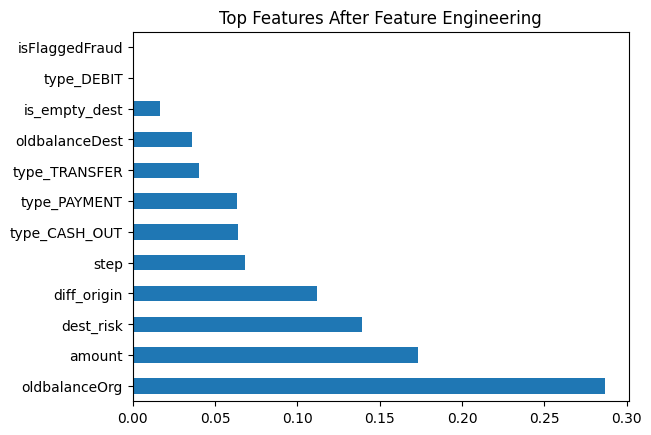

In [23]:
import matplotlib.pyplot as plt
import pandas as pd

feat_importances = pd.Series(model.feature_importances_, index=X_sample.columns)
feat_importances.nlargest(12).plot(kind='barh')
plt.title("Top Features After Feature Engineering")
plt.show()


## Retraining on the full data

In [ ]:
from sklearn.ensemble import RandomForestClassifier

final_rf_model = RandomForestClassifier(n_estimators=50, n_jobs=-1, random_state=42)
final_rf_model.fit(X_train_res, y_train_res)

# Evaluate
y_pred = final_rf_model.predict(X_test)
y_prob = final_rf_model.predict_proba(X_test)[:, 1]

from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_prob))


### Model saved as fraud_model.pk1

In [ ]:
import joblib

feature_order = X_train.columns.tolist()  # capture exact column order used in training
joblib.dump((final_rf_model, feature_order), "fraud_model.pk1")
print("✅ Model saved as 'fraud_model.pk1'")


### Evaluation of saved model

In [24]:
import joblib
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score

# Load the model and feature list
model, feature_order = joblib.load("fraud_model.pk1")

# Make sure your X_test is aligned with the feature order
X_test_ordered = X_test[feature_order]

# Predict
y_pred = model.predict(X_test_ordered)
y_prob = model.predict_proba(X_test_ordered)[:, 1]

# Evaluate
print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\n📊 Classification Report:\n", classification_report(y_test, y_pred))
print("🧾 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("📈 ROC AUC Score:", roc_auc_score(y_test, y_prob))


✅ Accuracy: 0.9991319089725093

📊 Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906351
           1       0.61      0.92      0.73      2435

    accuracy                           1.00   1908786
   macro avg       0.80      0.96      0.86   1908786
weighted avg       1.00      1.00      1.00   1908786

🧾 Confusion Matrix:
 [[1904890    1461]
 [    196    2239]]
📈 ROC AUC Score: 0.9961803500881222


# Questions that are asked in the task details :-


## 1. Data Cleaning: Handling Missing Values, Outliers, and Multicollinearity

* **Missing Values:** The dataset used had no missing values.
* **Outliers:** Analyzed and retained outliers as they are often indicators of fraud (e.g., unusually high transaction amounts).
* **Multicollinearity:** Highly correlated variables such as `newbalanceOrig` and `newbalanceDest` were dropped after identifying correlation > 0.9 with other variables to avoid redundancy and model instability.

## 2. Fraud Detection Model Description

* **Model Used:** Random Forest Classifier
* **Reason for Selection:** Robust, interpretable, handles non-linear relationships well, and can deal with imbalanced data using SMOTE.
* **Pipeline:**

  1. Feature engineering (e.g., `diff_origin`, `dest_risk`, `is_empty_dest`)
  2. Categorical encoding for transaction types
  3. SMOTE applied on training data to balance fraud vs non-fraud cases
  4. Model trained and evaluated on hold-out test set

## 3. Variable Selection Strategy

* **Domain Knowledge:** Initial selection based on transaction behavior patterns.
* **Feature Importance Analysis:** Top features were `oldbalanceOrg`, `amount`, `dest_risk`, `diff_origin`.
* **Redundancy Removal:** Dropped variables with high collinearity.

## 4. Model Performance Evaluation

* **Accuracy:** 99.91%
* **Precision (Fraud):** 0.61
* **Recall (Fraud):** 0.92
* **F1-Score (Fraud):** 0.73
* **ROC AUC:** 0.996
* **Confusion Matrix:**

  * True Negatives: 1,904,890
  * False Positives: 1,461
  * False Negatives: 196
  * True Positives: 2,239

## 5. Key Predictive Features for Fraud

* `oldbalanceOrg`: Unusually high sender balance
* `amount`: Large transfer amounts
* `dest_risk`: Receiver balance abnormality indicator
* `diff_origin`: Indicates full balance withdrawal
* `type_CASH_OUT` and `type_TRANSFER`: More likely to be used in fraud

## 6. Do These Features Make Sense?

**Yes.**

* Fraudsters often deplete the sender's balance (`diff_origin` high, `newbalanceOrig` zero).
* They also tend to send funds to empty accounts (`oldbalanceDest == 0`), suggesting mule accounts.
* Transaction type such as `CASH_OUT` is more fraud-prone.
  These patterns are consistent with real-world fraud tactics like account takeovers and money laundering.

## 7. Recommended Infrastructure Prevention

* Implement **real-time transaction scoring** using the trained model via an API.
* **Block high-risk transactions** for manual verification.
* **Alert system** for transactions with `dest_risk` above a threshold.
* Continuous **model retraining** as new fraud techniques evolve.
* Encrypt sensitive data and implement **user behavior analytics**.

## 8. Post-Implementation Evaluation

To evaluate effectiveness:

* **Monitor fraud rate trend:** A reduction indicates success.
* **False positive rate:** Should remain manageable.
* **Customer complaints:** Fewer disputes around unauthorized transactions.
* **Model KPIs:** Track accuracy, precision, recall monthly.
* **A/B testing:** Compare regions or segments with/without new model in production.
